# Y&Z 세대 투자자 프로파일링

## 목차

1. 데이터 전처리
2. Y&Z세대 파헤치기
    - 투자성향 비교
    - 고객등급 비교
    - 투자종목 비교
3. 해외 투자 관련 분석
    - 연령대별 국내 투자대비 해외 투자 비율
    - 투자성향별 투자국가 
    - 등급별 투자국가
4. 코로나 전/후 비교
    - 연도별 계좌 개설 수 비교
    - 코로나 전후 거래량 비교
    - 코로나 이후 투자종목 변화
5. 수익률
    - 수익률의 절대값이 80이상/미만인 yz투자자의 투자성향
    - yz 세대의 수익률 상위 10% 투자자들이 가장 많이 투자한 종목 10개

## 1. 데이터 전처리

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import operator
from wordcloud import WordCloud, STOPWORDS

In [3]:
act_info = pd.read_csv('2_act_info.csv') #계좌정보
cus_info = pd.read_csv('2_cus_info.csv') #고객정보
iem_info = pd.read_csv('2_iem_info.csv') #주식
trd_kr = pd.read_csv('2_trd_kr.csv') #국내
trd_oss = pd.read_csv('2_trd_oss.csv') #해외

In [4]:
act_info.head(5)

,act_id,cus_id,act_opn_ym
0,8e1a987ebef2a3374ba558aeda4c7821de7808a11cfea1...,892f41b5002a79c9c93992acf60682f5698372aea023bd...,197912
1,eb161b66263589c3f38efd2277cec2a9a81e1ffa0a5255...,006ad32069efb2a8ce1a99542dfe41cb14e8e75685278a...,198702
2,01866857515304e9e1315e54863cc1108e1d46fff0d467...,1925ed2d8ed2cad53997f5b24722482137c4d1da4b555e...,199109
3,63a58b0fee2fa4dc467c043fde465846b65705659497c5...,7829365dc463ed8275c8b92518d58b3c8d983f00f7bf87...,199401
4,b563fb76d3d432d67198f194701ca67e895da4c2f24e8e...,36e05dde058cf7531bd4001ed3b976ef9562a9ecd9f43d...,199404


In [5]:
cus_info.head(5)

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-


In [6]:
iem_info.head(5)

,iem_cd,iem_eng_nm,iem_krl_nm
0,A000060,Meritz Fire & Marine Insurance ...,메리츠화재해상보험보통주 ...
1,A000120,CJ LOGISTICS ...,씨제이대한통운보통주 ...
2,A000540,HeungkukFire&MarineInsurance ...,흥국화재해상보험보통주 ...
3,A00088K,HANWHA(3PB) ...,한화3우선주(신형) ...
4,A000950,Chonbang ...,전방보통주 ...


In [7]:
trd_kr.head(5)

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3
1,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,2,12,12,A001060,2,20.0,41100.0,3
2,effb34815e1b7efb34beb550f604ede8ac71a5a71edb30...,20190102,1,14,14,A281820,2,20.0,9460.0,4
3,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,1,12,12,A006650,2,1.0,148500.0,3
4,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,2,12,13,A051360,2,10.0,6550.0,3


In [8]:
trd_oss.head(5)

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00


In [9]:
#국내
iem_trd_kr = pd.merge(trd_kr, iem_info, on = 'iem_cd', how = 'left')
iem_trd_kr_cus = pd.merge(iem_trd_kr, act_info, on = 'act_id', how = 'left')
df_kr = pd.merge(iem_trd_kr_cus, cus_info, on = 'cus_id', how = 'left')
display(df_kr.head(5))
display(df_kr.shape)

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,iem_krl_nm,cus_id,act_opn_ym,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3,"SillaJen, Inc. ...",신라젠 ...,8eafaa5dc6eb52ada6b2d93ae1a0544f2c91e71667c945...,200512,1,55,11,02,05
1,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,2,12,12,A001060,2,20.0,41100.0,3,JWPHARMACEUTICAL ...,JW중외제약보통주 ...,8eafaa5dc6eb52ada6b2d93ae1a0544f2c91e71667c945...,200512,1,55,11,02,05
2,effb34815e1b7efb34beb550f604ede8ac71a5a71edb30...,20190102,1,14,14,A281820,2,20.0,9460.0,4,KCTECH ...,케이씨텍보통주 ...,1d6cbe3709fcfb798268d27058a2c89e191c7893060a66...,199810,2,50,44,04,-
3,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,1,12,12,A006650,2,1.0,148500.0,3,KOREA PETRO CHEMICAL IND ...,대한유화보통주 ...,f682d5d3e7a44cfc687e78366d638ae324d79b3dcf8247...,201109,1,35,30,04,04
4,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,2,12,13,A051360,2,10.0,6550.0,3,"TOVIS Co., LTD ...",토비스 ...,f682d5d3e7a44cfc687e78366d638ae324d79b3dcf8247...,201109,1,35,30,04,04


(3312664, 19)

In [10]:
#해외
iem_trd_oss = pd.merge(trd_oss, iem_info, on = 'iem_cd', how = 'left')
iem_trd_oss_cus = pd.merge(iem_trd_oss, act_info, on = 'act_id', how = 'left')
df_oss = pd.merge(iem_trd_oss_cus, cus_info, on = 'cus_id', how = 'left')
df_oss
display(df_oss.head(5))
display(df_oss.shape)

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,...,trd_cur_xcg_rt,iem_eng_nm,iem_krl_nm,cus_id,act_opn_ym,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,...,162.55,BYD ...,비아적(BYD) ...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,201706,1,30,28,03,05
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,...,1118.10,Apple ...,애플 ...,a1acec92e7ead66132d45bcebc38354a6c42d8ac7d4f8b...,201811,1,30,43,09,04
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,...,1118.10,Realty Income ...,리얼티 인컴 ...,a1acec92e7ead66132d45bcebc38354a6c42d8ac7d4f8b...,201811,1,30,43,09,04
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,...,1119.00,Vanguard 500 Idx ...,뱅가드S&P500ETF ...,c13865b4ad055d64c3b6a44b7f56de27ac21aa35a11788...,201810,1,35,41,09,04
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,...,1119.00,ProShares:UltP Q ...,프로셰어즈 울트라프로 QQQ ...,f87f19af42d81fd9acf4e3377a5434eaf76c2636674982...,201811,1,20,48,05,04


(29301, 21)

## 2. Y&Z세대 파헤치기
### 2-1.투자성향 비교

In [11]:
cus_info.head(10)

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-
5,68512a62994578c8d382fd953f1638bae1d19c269ebed3...,1,70,28,04,-
6,9a1931d5454b82d8ae9063e7b536468df40eba2923b2ed...,1,70,11,01,04
7,36d3d9105d5a3489e89a3a947c3d623fa80354784dcafa...,1,70,11,02,04
8,ff4e513cb490199ce46e7c2f6e10047124b06a86239f3d...,1,70,26,02,-
9,a09bd99d65b6d9aab7c25ad16617cd03c9beb1a5a79c67...,1,70,43,04,04


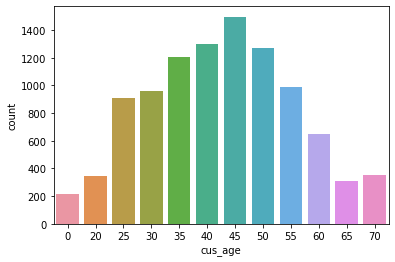

In [12]:
sns.countplot(x='cus_age',data=cus_info)

투자자의 나이대 분포를 살펴보면 40대가 가장 많다.

In [13]:
cus_info['generation'] = cus_info['cus_age']<40 # False: X세대 이상, True: Y&Z세대

In [14]:
cus_info.head(5)

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,generation
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,True
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-,True
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-,False
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-,False
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-,False


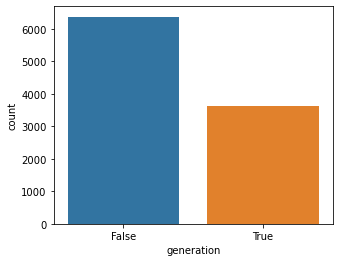

In [15]:
# 세대별 분포 True: Y&Z세대 False: X세대 이상
plt.figure(2, figsize=(5, 4))
sns.countplot(x='generation', data=cus_info)

세대별 분포를 살펴보면 False( X세대 이상 )이 훨씬 많다.

#### 2-1-1.세대별 고객투자성향

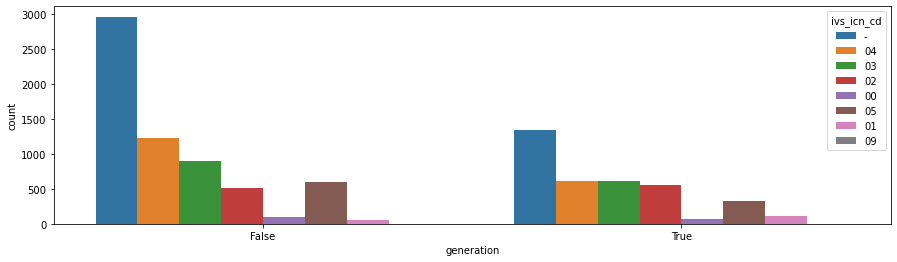

In [16]:
#True: Y&Z세대 False: X세대 이상
plt.figure(2, figsize=(15, 4))
sns.countplot(x='generation', hue='ivs_icn_cd', data=cus_info)

세대별 고객 투자성향을 살펴보면, 
1) False(X세대 이상)
    - 04적극투자형 > 03위험중립형 > 05공격투자형 > 02안정추구형 > 01안정형
2) True(Y&Z세대)
    - 03위험중립형 = 04적극투자형 > 05공격투자형 > 02안정추구형 > 01안정형
로 두 세대가 비슷한 결과를 보인다.  (차이점은 Y&Z세대는 X세대보다 적극투자형이 적은편)

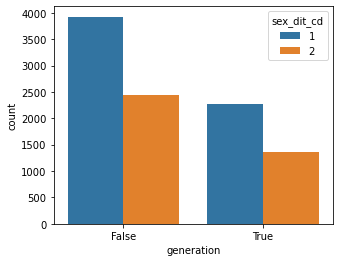

In [17]:
#세대별 성별 True: Y&Z세대 False: X세대 이상
plt.figure(2, figsize=(5, 4))
sns.countplot(x='generation', hue='sex_dit_cd', data=cus_info)

세대별 성별을 살펴보면, 
- X세대, Y&Z세대 모두 남성이 더 많다
- Y&Z세대가 격차가 더 적다

#### 2-1-2.성별별 고객투자성향

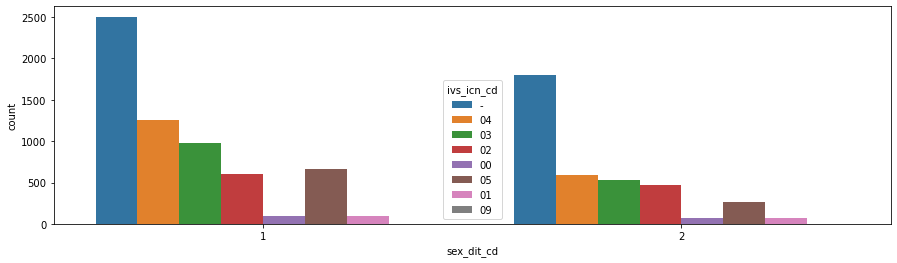

In [18]:
plt.figure(2, figsize=(15, 4))
sns.countplot(x='sex_dit_cd', hue='ivs_icn_cd', data=cus_info)

성별에 따른 고객투자성향을 살펴보아도 큰 차이는 없다.

### 2-2.고객등급 비교

#### 2-2-1.세대별 고객등급

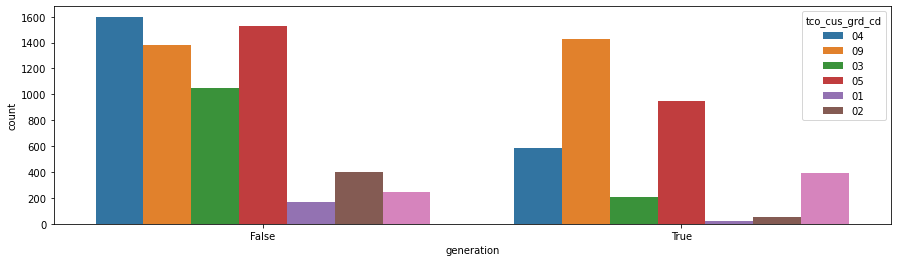

In [19]:
#True: Y&Z세대 False: X세대 이상
plt.figure(2, figsize=(15, 4))
sns.countplot(x='generation', hue='tco_cus_grd_cd', data=cus_info)

세대별 고객 등급을 살펴보면, 
1) False(X세대 이상)
    - 04 > 05 > 09(등급없음) > 03 > 02 > 01
2) True(Y&Z세대)
    - 09(등급없음) > 05 > 04 > 03 > 02 > 01
    
등급 04와 등급 09의 차이를 볼 때, X세대의 고객등급이 Y세대의 고객등급보다 전반적으로 높다.

### 2-3.투자종목 비교

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [21]:
#x세대와 yz세대 데이터프레임
df_kr_yz = df_kr[df_kr['cus_age']<40]
df_kr_yz.reset_index(drop = True, inplace = True)
df_kr_x = df_kr[df_kr['cus_age']>=40]
df_kr_x.reset_index(drop = True, inplace = True)

#### 2-3-1.국내 투자종목 비교

In [25]:
df_kr_yz_name=df_kr_yz['iem_krl_nm'].value_counts()
df_kr_x_name=df_kr_x['iem_krl_nm'].value_counts()

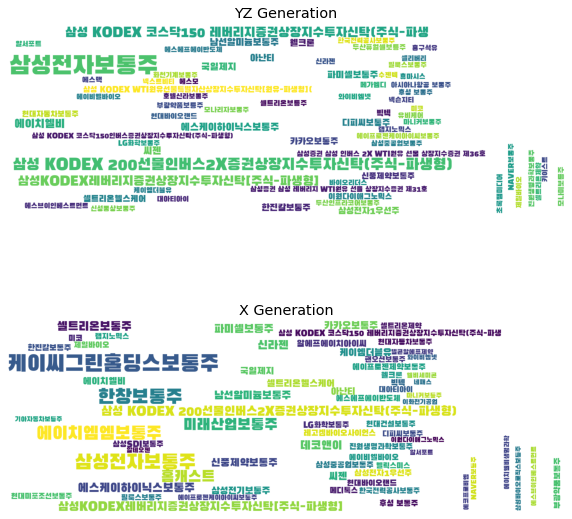

In [26]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(10,10))
ax1.axis('off')
ax2.axis('off')
wordcloud1 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(df_kr_yz_name)
wordcloud2 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(df_kr_x_name)
ax1.set_title('YZ Generation',fontsize='x-large')
ax2.set_title('X Generation',fontsize='x-large')
ax1.imshow(wordcloud1)
ax2.imshow(wordcloud2)
plt.show()

Y&Z세대의 투자종목과 X세대의 투자종목을 비교해본 결과 Y&Z세대는 X세대보다 대형주에 더 많이 투자하는 경향이 있다.특히 Y&Z세대는 삼성KODEX관련 주식이 많이 보이는 것으로 보아 안정적인 주식에 투자하는 경향이 있다고 볼 수 있다.

In [135]:
#20대, 30대 투자종목 비교
df_kr_yz_20 = df_kr[(df_kr['cus_age']==20)|(df_kr['cus_age']==25)]
df_kr_yz_20.reset_index(drop = True, inplace = True)
df_kr_yz_30 = df_kr[(df_kr['cus_age']==30)|(df_kr['cus_age']==35)]
df_kr_yz_30.reset_index(drop = True, inplace = True)
df_kr_yz_30_name=df_kr_yz_30['iem_krl_nm'].value_counts()
df_kr_yz_20_name=df_kr_yz_20['iem_krl_nm'].value_counts()

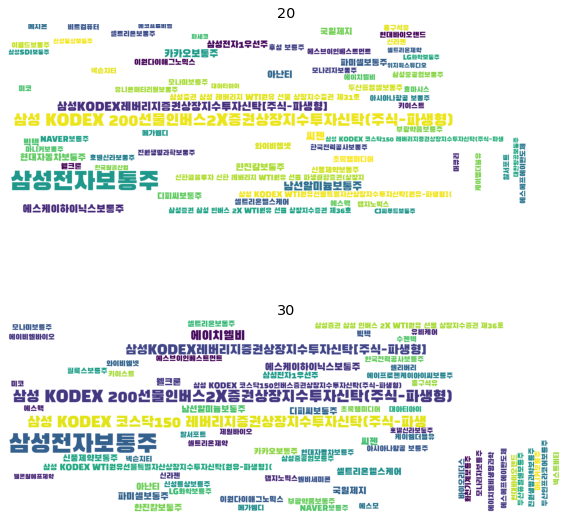

In [136]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(10,10))
ax1.axis('off')
ax2.axis('off')
wordcloud1 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(df_kr_yz_20_name)
wordcloud2 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(df_kr_yz_30_name)
ax1.set_title('20',fontsize='x-large')
ax2.set_title('30',fontsize='x-large')
ax1.imshow(wordcloud1)
ax2.imshow(wordcloud2)
plt.show()

20대와 30대의 투자종목은 큰 차이를 보이진 않는다.

#### 2-3-2.해외 투자종목 비교

In [79]:
df_oss_yz = df_oss[df_oss['cus_age']<40]
df_oss_yz.reset_index(drop = True, inplace = True)
df_oss_x = df_oss[df_oss['cus_age']>=40]
df_oss_x.reset_index(drop = True, inplace = True)

In [82]:
df_oss_yz_name=df_oss_yz['iem_krl_nm'].value_counts()
df_oss_x_name=df_oss_x['iem_krl_nm'].value_counts()

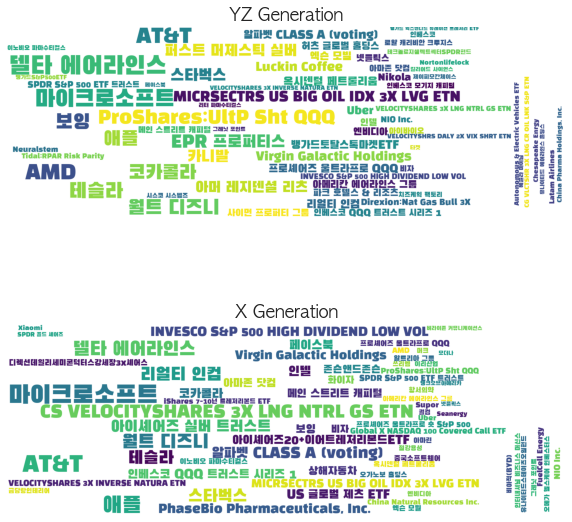

In [83]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(10,10))
ax1.axis('off')
ax2.axis('off')
wordcloud1 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(df_oss_yz_name)
wordcloud2 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(df_oss_x_name)
ax1.set_title('YZ Generation',fontsize='x-large')
ax2.set_title('X Generation',fontsize='x-large')
ax1.imshow(wordcloud1)
ax2.imshow(wordcloud2)
plt.show()

## 3. 해외 투자 관련 분석
### 3-1.연령대별 국내 투자대비 해외 투자 비율
#### 3-1-1. 연령대별 해외 투자

In [27]:
trd_oss.groupby('cur_cd').nunique()

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
cur_cd,,,,,,,,,,,,
AUD,3,4,2,2,2,5,2,4,5,1,1,4
CAD,10,14,12,4,6,3,2,22,16,1,1,14
CNY,67,187,71,6,6,95,2,153,649,3,1,166
EUR,17,34,4,11,10,14,2,9,50,2,1,33
GBP,4,20,7,8,8,6,2,28,37,1,1,20
HKD,42,109,22,8,8,37,2,43,166,3,1,106
IDR,5,22,15,7,7,8,2,31,31,2,1,18
JPY,16,47,5,7,6,16,2,28,76,3,1,47
SGD,1,1,30,1,1,1,1,2,1,1,1,1


In [28]:
# 고객 정보와 해외 거래 정보 연결
a1 = pd.merge(cus_info, act_info, on = 'cus_id', how = 'left')
a1 = pd.merge(a1, trd_oss, on = 'act_id', how = 'left')
#고객 나이별 각 국가에 대한 거래 내역 횟수
b1 = pd.DataFrame(a1.groupby(['cus_age','cur_cd'])['cus_id'].nunique().reset_index())

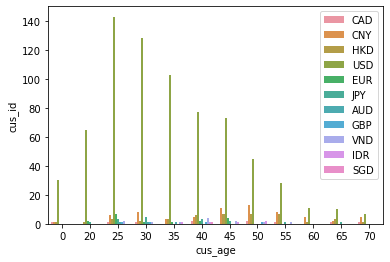

In [29]:
ax = sns.barplot(x='cus_age',y='cus_id',hue='cur_cd',data=b1 )
ax.legend(loc='upper right')

모든 연령대에서 USD(미국달러)에 대한 투자량이 가장 많다. 특히 Y,Z세대의 경우 다른 세대에 비해 월등하게 차이가 난다. 또한 20세~25세 미만을 제외한 Y,Z세대의 해외 투자량이 다른 세대에 비해 월등하게 많다. 

USD값이 너무 커서 다른 국가에 대한 분포가 보이지 않기 때문에 자세히 보기 위해 USD를 제외하고 다시 그려보았다.

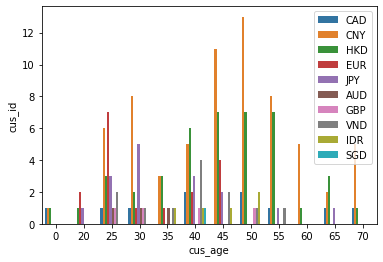

In [30]:
# USD 제외한 고객 나이별 각 국가에 대한 거래 내역 횟수
b_1 = b1[b1['cur_cd'] != 'USD']

ax=sns.barplot(x='cus_age',y='cus_id',hue='cur_cd',data=b_1 )
ax.legend(loc='upper right')

25~45세가 다른 연령대에 비해 해외투자를 골고루 하고 있다는 것을 알 수 있다. USD를 제외하면 특히 Y세대는 CNY(중국위안화)에 대해, Z세대는 EUR(유로)와 CNY에 대해, 그리고 그 이상의 세대는 CNY와 HKD(홍콩달러)에 대해 투자를 많이 하는 것으로 보인다.

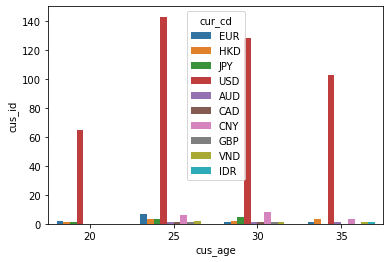

In [31]:
#참고용으로 20, 30대의 그림만 다시 그려봄
b_1 = b1[((b1['cus_age']==20)|(b1['cus_age']==25)|(b1['cus_age']==30)|(b1['cus_age']==35))]
sns.barplot(x='cus_age',y='cus_id',hue='cur_cd',data=b_1 )

관심있는 Y,Z세대의 해외 투자 그래프를 다시 그려본 결과 위에서 언급한 것과 같이 USD가 압도적이며, 다른 국가에 대한 그래프는 이 그래프보단 그 위 그래프를 보는 것이 나을 것이다.

#### 3-1-2. 연령대별 국내 투자

In [32]:
# 고객 정보와 국내 거래 정보 연결
a2 = pd.merge(cus_info, act_info, on = 'cus_id', how = 'left')
a2 = pd.merge(a2, trd_kr, on = 'act_id', how = 'left')
#고객 나이별 국내 거래 내역 횟수
b2 = pd.DataFrame(a2.groupby('cus_age')['cus_id'].nunique().reset_index())

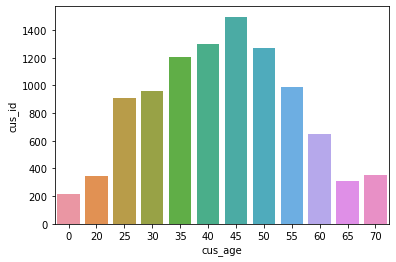

In [33]:
sns.barplot(x='cus_age',y='cus_id',data=b2 )

연령대별로 국내 투자에 대해 그래프를 그려보았을 때, 40대의 국내 투자량이 다른 연령대에 비해 가장 많고, 관심 연령대인 Y,Z세대는 그보단 투자량이 적은 편이다. 해외투자의 경우와 마찬가지로 20대 중반 이후 투자에 대한 관심이 확연하게 증가한다는 것을 알 수 있다.

#### 3-1-3. 연령대별 국내 투자대비 해외 투자 비율

In [43]:
print('국내투자자 수 : ',len(np.unique(df_kr['cus_id'])))
print('해외투자자 수 : ',len(np.unique(df_oss['cus_id'])))
temp_kr_cus_id = list(np.unique(df_kr['cus_id']))
temp_oss_cus_id = list(np.unique(df_oss['cus_id']))
both_cus_id = set(temp_oss_cus_id).intersection(temp_kr_cus_id)
kr_cus_id = [x for x in temp_kr_cus_id if x not in both_cus_id]
oss_cus_id = [x for x in temp_oss_cus_id if x not in both_cus_id]
print('국내에만 투자하는 투자자 수 : ',len(kr_cus_id))
print('해외에만 투자하는 투자자 수 : ',len(oss_cus_id))
print('국내,해외 모두 투자하는 투자자 수 : ',len(both_cus_id))
kr_cus = cus_info[cus_info['cus_id'].isin(kr_cus_id)]
oss_cus = cus_info[cus_info['cus_id'].isin(oss_cus_id)]
both_cus = cus_info[cus_info['cus_id'].isin(both_cus_id)]

국내투자자 수 :  9909
해외투자자 수 :  789
국내에만 투자하는 투자자 수 :  9211
해외에만 투자하는 투자자 수 :  91
국내,해외 모두 투자하는 투자자 수 :  698


Text(0.5, 1.0, '해외 투자자의 연령 비율')

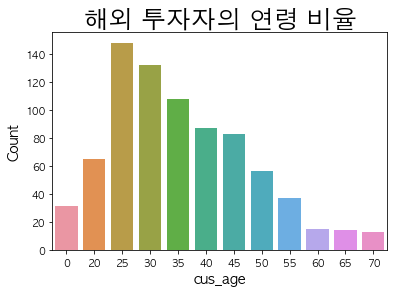

In [50]:
#해외 주식 투자자의 연령 비율
plt.rcParams['font.family'] = 'AppleGothic'
a=sns.countplot(cus_info[cus_info['cus_id'].isin(temp_oss_cus_id)]['cus_age'].sort_values())
a.set_xlabel('cus_age',fontsize=14)  # x축 이름 설정
a.set_ylabel('Count',fontsize=14) # y축 이름 설정
a.set_title('해외 투자자의 연령 비율',fontsize=25) # 그래프 제목 설정

Text(0.5, 1.0, '국내 투자자의 연령 비율')

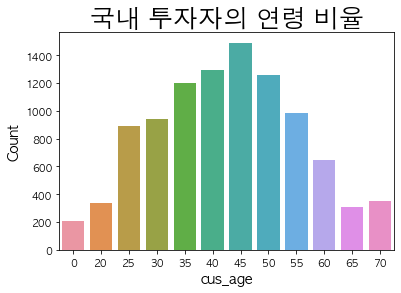

In [51]:
#국내 주식 투자자의 연령 비율
a=sns.countplot(cus_info[cus_info['cus_id'].isin(temp_kr_cus_id)]['cus_age'].sort_values())
a.set_xlabel('cus_age',fontsize=14)  # x축 이름 설정
a.set_ylabel('Count',fontsize=14) # y축 이름 설정
a.set_title('국내 투자자의 연령 비율',fontsize=25) # 그래프 제목 설정

전체 고객 중 국내 투자자의 비율이 99%로 대부분의 고객이 국내에서 투자를 하는 것으로 나타났다. 
전체 고객의 약 8% 만이 해외투자를 하고 있는데 이들 역시 대부분 국내 투자를 병행하고 있는 것으로 나타났으며 해외투자를 하는 고객의 연령대가 전체 고객의 연령대에 비해 낮은 것을 알 수 있었다. 
즉 해외투자의 경우 yz 세대 고객의 비율이 상대적으로 높았다. 

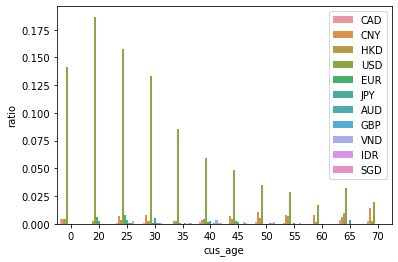

In [34]:
#고객 나이별 국내 거래 대비 해외 거래 내역
b3 = pd.merge(b1, b2, on = 'cus_age', how = 'left')
b3['ratio'] = b3['cus_id_x']/b3['cus_id_y']
ax=sns.barplot(x='cus_age',y='ratio',hue='cur_cd',data=b3 )
ax.legend(loc='upper right')

해외 국가들중 그나마 투자량이 많은 미국의 경우에도 국내 투자량에 비하면 많아야 17.5%를 약간 넘기고, 그 외 국가는 2.5% 미만이다. 그래도 Y,Z세대의 국내 투자 대비 해외 투자 비율이 다른 연령대에 비해 높은 편이다. 

### 3-2.투자성향별 투자국가

Text(0.5, 1.0, 'all')

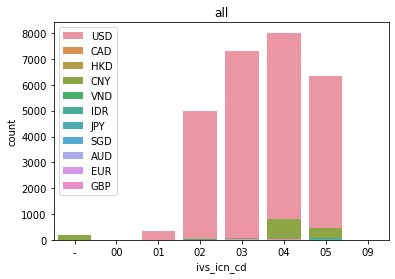

In [35]:
# 고객 정보와 해외 거래 정보 연결
a1 = pd.merge(cus_info, act_info, on = 'cus_id', how = 'left')
a1 = pd.merge(a1, trd_oss, on = 'act_id', how = 'left')
#전체
ax=sns.countplot(x='ivs_icn_cd',hue='cur_cd',data=a1, dodge= False,
                order = sorted(a1['ivs_icn_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("all")

1-3 안정, 중립 / 4-5 위험 / 9 전문

투자 성향별 투자 국가 그래프를 그려보니 투자성향이 공격적일수록 해외 투자량이 증가할 것이라 예상했는데, 의외로 가장 공격투자형인 5에서 투자량이 4보다 줄어들었다. 안정형을 제외하고 봤을때, 투자 성향과 상관없이 USD 투자량은 비슷하게 많아보이고, 더 위험 추구 성향이 되면 그 외 국가(CNY)에 대해 투자를 늘리는 것으로 보인다. 




Y,Z세대도 전체 연령대와 비슷한 성향을 보이는지 확인하기 위해 추가적으로 그래프를 그려보았다.

In [42]:
# Y세대와 Z세대 정보만 추출
a1_30 = a1[(a1['cus_age']==30) | (a1['cus_age']==35)]
a1_30.reset_index(drop = True, inplace = True)

a1_20 = a1[(a1['cus_age']==20) | (a1['cus_age']==25)]
a1_20.reset_index(drop = True, inplace = True)
display(a1_20.head(5))

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,generation,act_id,act_opn_ym,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311aed5389a2c6ce92b60,2,20,29,04,-,True,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c8fd18c09f3e1c03e86,200110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8fbdbe578d91cf5da779308f5532e670a019faf62b7d2430b8886d2f3121feb9,1,25,41,05,05,True,cb969784c289905b2e11a5c09235e7bd0a5b053e43f01dfaab04fade18b02a00,200411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8fbdbe578d91cf5da779308f5532e670a019faf62b7d2430b8886d2f3121feb9,1,25,41,05,05,True,261ea6d393d9018f67404b98c27908dd83c4fde1ed2e976d7c8a7f981ba05c36,201503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8fbdbe578d91cf5da779308f5532e670a019faf62b7d2430b8886d2f3121feb9,1,25,41,05,05,True,148f606b133795e28797dfd78bf5d0f7486534acda756578620d8a31432f851c,200604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8fbdbe578d91cf5da779308f5532e670a019faf62b7d2430b8886d2f3121feb9,1,25,41,05,05,True,3b8c249d312c555dd2f3966da0e63225ce960a4769c5979d308626c4dcf19598,201503,20200318.0,1.0,0.0,2.0,US0079031078,2.0,5.0,39.0,3.0,USD,1241.2


Text(0.5, 1.0, '30')

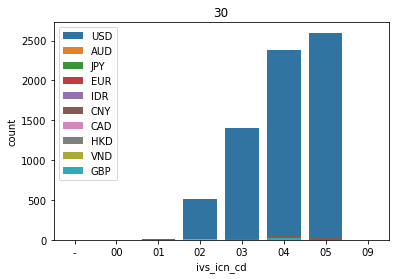

In [37]:
# Y세대(30대)
ax=sns.countplot(x='ivs_icn_cd',hue='cur_cd',data=a1_30, dodge= False,
                order = sorted(a1['ivs_icn_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("30")

Text(0.5, 1.0, '20')

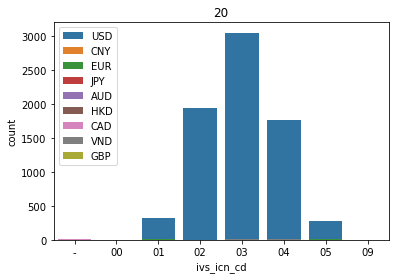

In [38]:
# Z세대(20대)
ax=sns.countplot(x='ivs_icn_cd',hue='cur_cd',data=a1_20, dodge= False,
                order = sorted(a1['ivs_icn_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("20")

1-3 안정, 중립 / 4-5 위험 / 9 전문

Y세대(30대)의 경우는 예상과 일치하는 형태로, 더 공격적인 성향일수록 해외 투자량이 증가하는 모습을 보였고, Z세대(20대)의 경우는 중립형이 가장 해외투자를 많이 했으며 3을 대칭으로 감소하는 형태를 보이는게 특이했다. 

Y,Z세대도 전체 연령대 그래프와 유사하게 USD 투자가 압도적으로 많았고, 다른 국가는 보이지 않는다.

### 3-3. 고객등급별 투자국가

Text(0.5, 1.0, 'all')

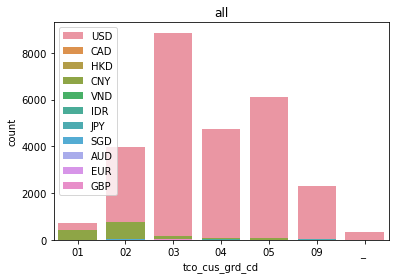

In [39]:
ax=sns.countplot(x='tco_cus_grd_cd',hue='cur_cd',data=a1, dodge= False,
                order = sorted(a1['tco_cus_grd_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("all")

1 탑클래스 / 2 골드 / 3 로얄 / 4 그린 / 5 블루 / 9 등급 없음 => 작을수록 높은 등급

고객 등급별 해외 투자 그래프를 그려보았는데, 고객 등급과 해외 투자량 사이에는 큰 관계가 없어보였고, 고객 등급이 높으면 여러 국가에 투자를 하는 것으로 보인다.



Y,Z세대도 전체 연령대와 비슷한 성향을 보이는지 확인하기 위해 추가적으로 그래프를 그려보았다.

Text(0.5, 1.0, '30')

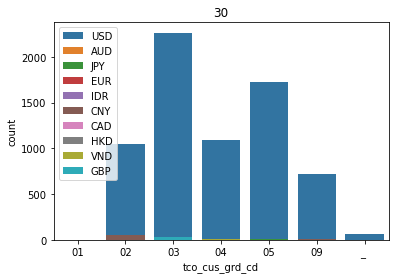

In [40]:
# Y세대(30대)
ax=sns.countplot(x='tco_cus_grd_cd',hue='cur_cd',data=a1_30, dodge= False,
                order = sorted(a1['tco_cus_grd_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("30")

Text(0.5, 1.0, '20')

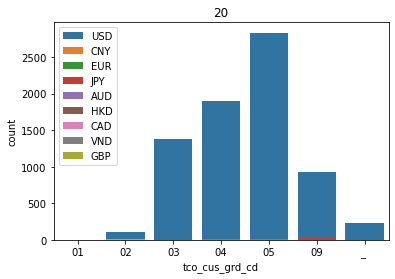

In [41]:
# Z세대(20대)
ax=sns.countplot(x='tco_cus_grd_cd',hue='cur_cd',data=a1_20, dodge= False,
                order = sorted(a1['tco_cus_grd_cd'].value_counts().index))
ax.legend(loc='upper left')
plt.title("20")

1 탑클래스 / 2 골드 / 3 로얄 / 4 그린 / 5 블루 / 9 등급 없음 => 작을수록 높은 등급

Y세대(30대)의 경우는 전체 연령대와 비슷한 형태의 그래프이고, 그나마 높은 등급인 2(골드), 3(로얄)에서 여러 국가에 투자한다고 할 수 있다. Z세대(20대)의 경우는 전체 연령대 그래프와 많이 다른 형태로 고객등급이 낮은편인 5(블루)에서의 투자량이 가장 많다. 20대이다보니 높은 등급 투자자 수 자체가 별로 없어서 형태 자체가 다른 것으로 예상된다. 또한 USD 외의 해외 투자가 거의 보이지 않는다.



## 4. 코로나 전/후 비교
### 4-1. 연도별 계좌 개설 수 비교

In [76]:
#계좌 개설 년월
df_kr_yz['act_opn_ym'].describe()

count    845603.000000
mean     201804.410613
std      230.789978   
min      198702.000000
25%      201712.000000
50%      201810.000000
75%      202001.000000
max      202006.000000
Name: act_opn_ym, dtype: float64

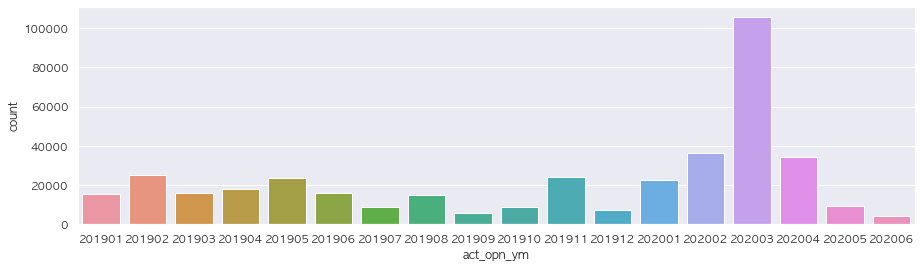

In [77]:
#2019년도 이후 계좌 개설 년월
df_kr_yz_after_2019=df_kr_yz[df_kr_yz['act_opn_ym']>201900]
plt.figure(2, figsize=(15, 4))
sns.countplot(x='act_opn_ym',data=df_kr_yz_after_2019)

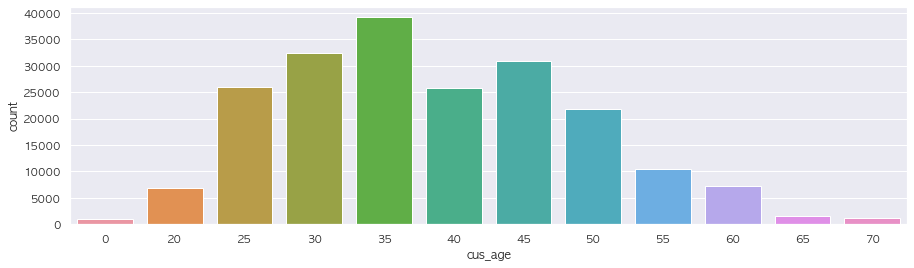

In [78]:
#2020년 03월 계좌 개설 사용자 나이 분포
df_kr_after_202003 = df_kr[df_kr['act_opn_ym']==202003]
plt.figure(2, figsize=(15, 4))
sns.countplot(x='cus_age',data=df_kr_after_202003)

In [90]:
cus_act = pd.merge(cus_info,act_info,how='inner')
trdkr_iem = pd.merge(trd_kr,iem_info,how='inner')
trdoss_iem = pd.merge(trd_oss,iem_info,how='inner')

In [100]:
act_info['act_opn_ym'] =  act_info['act_opn_ym'].astype(str)
act_info['act_opn_y'] = act_info['act_opn_ym'].str.slice(start=0,stop=4)
df_kr['act_opn_ym'] =  df_kr['act_opn_ym'].astype(str)
df_kr['act_opn_y'] = df_kr['act_opn_ym'].str.slice(start=0,stop=4)
df_oss['act_opn_ym'] =  df_oss['act_opn_ym'].astype(str)
df_oss['act_opn_y'] = df_oss['act_opn_ym'].str.slice(start=0,stop=4)

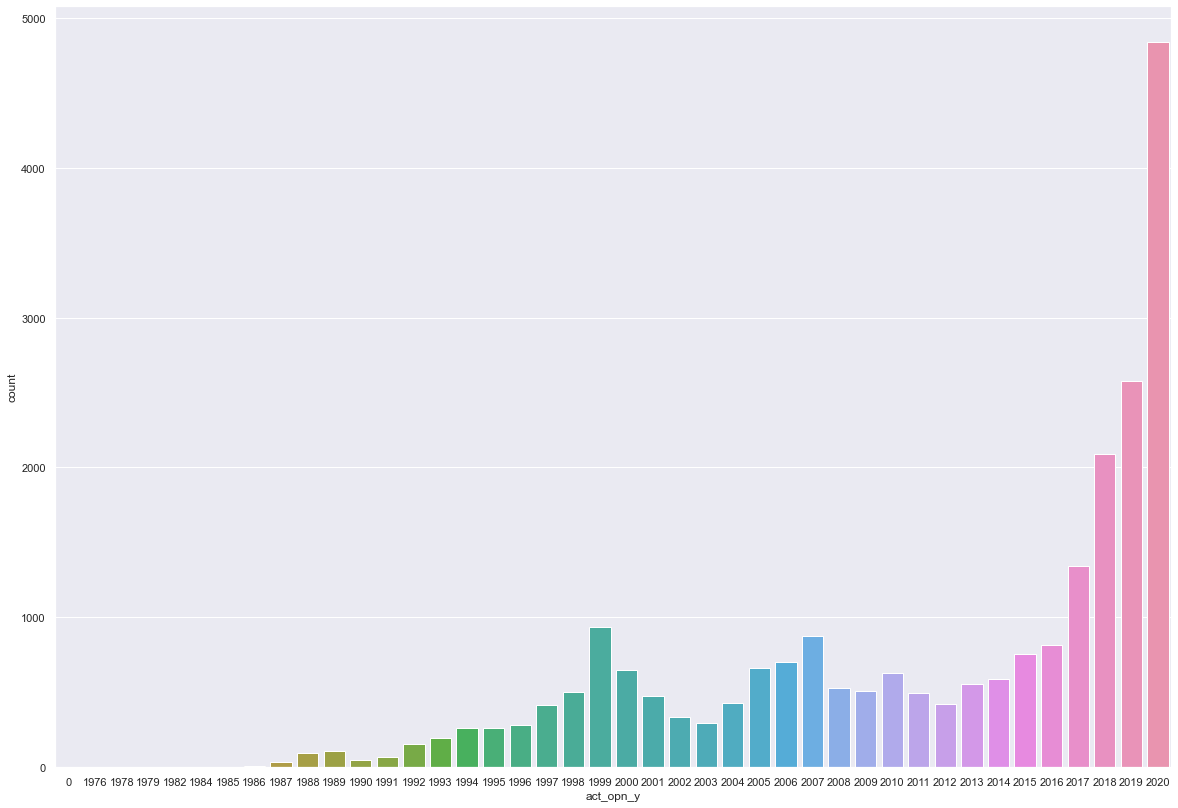

In [101]:
sns.set(rc={'figure.figsize':(20,14)})
a=sns.countplot(act_info['act_opn_y'])

#2020 상반기 계좌 개설 수가 대폭 증가하였다. 

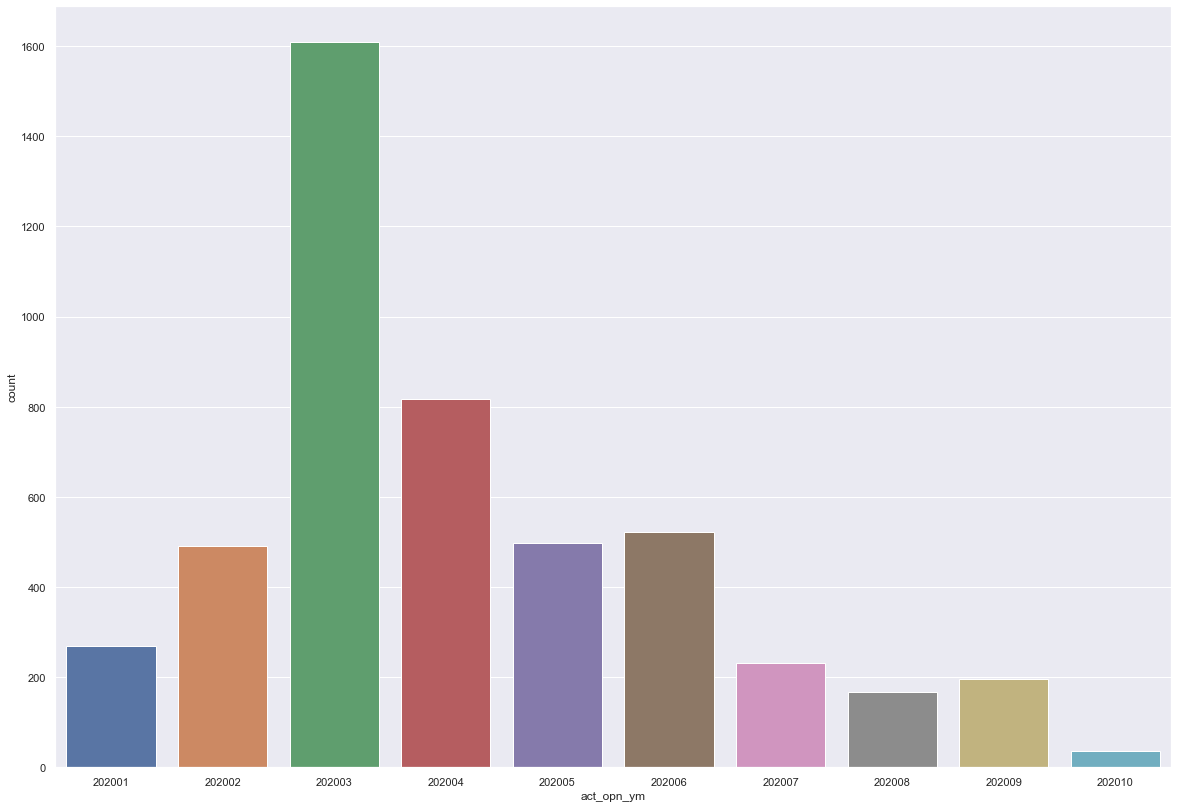

In [102]:
sns.countplot(act_info[act_info['act_opn_y']=='2020']['act_opn_ym'])
#특히 올해(2020) 3월 계좌 개설 수가 매우 높았다. 코로나의 영향으로 보인다. 

### 4-2. 코로나 전후 거래량 비교

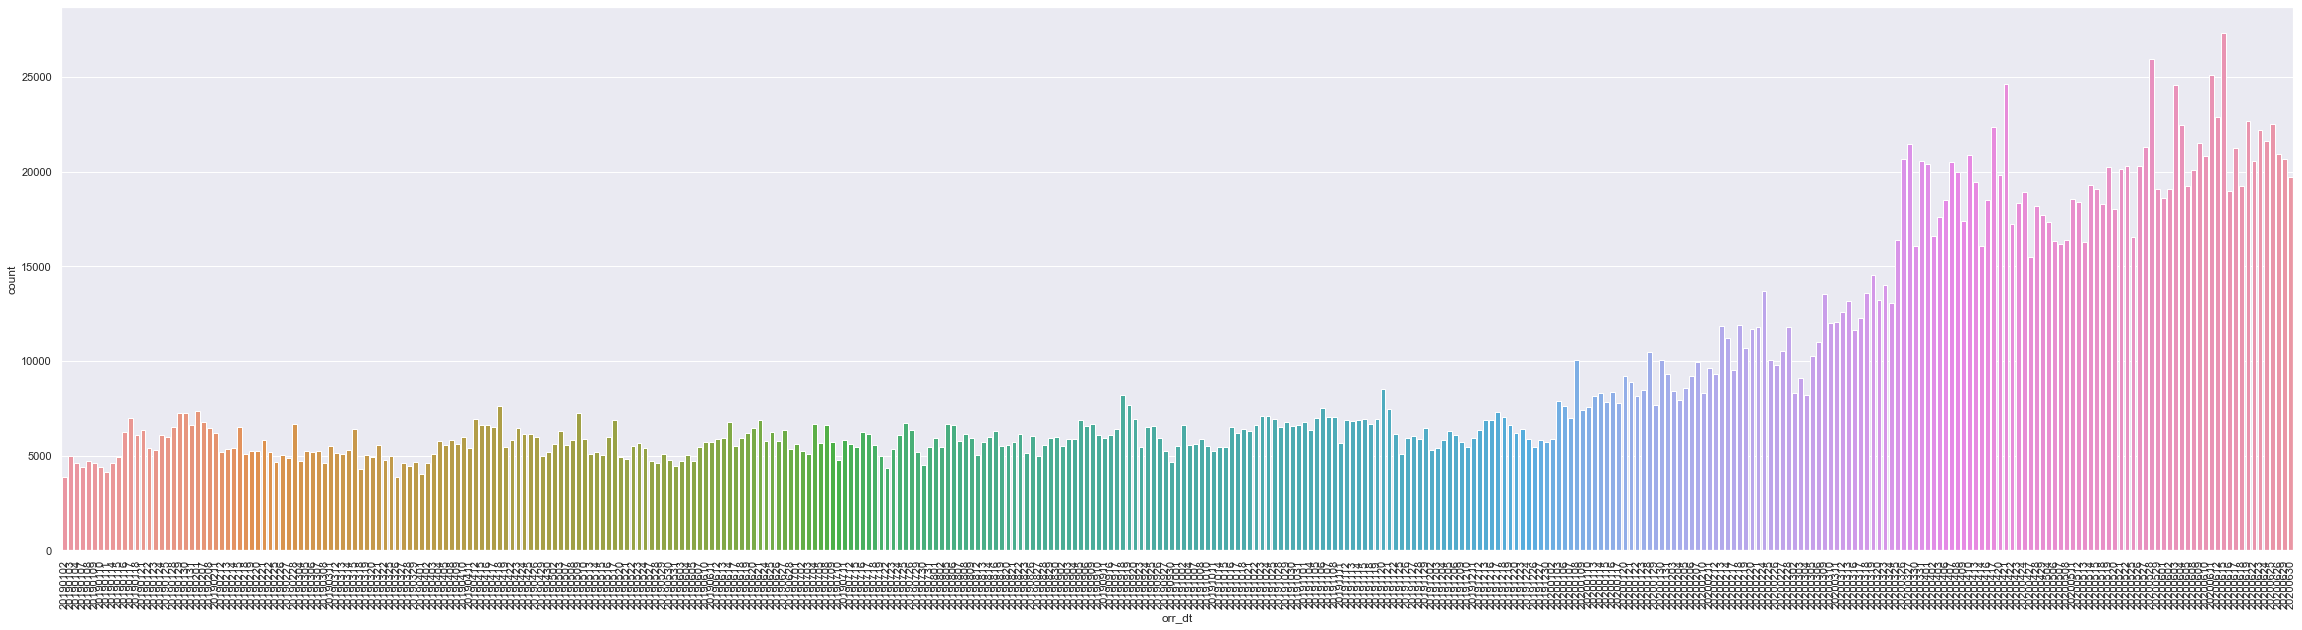

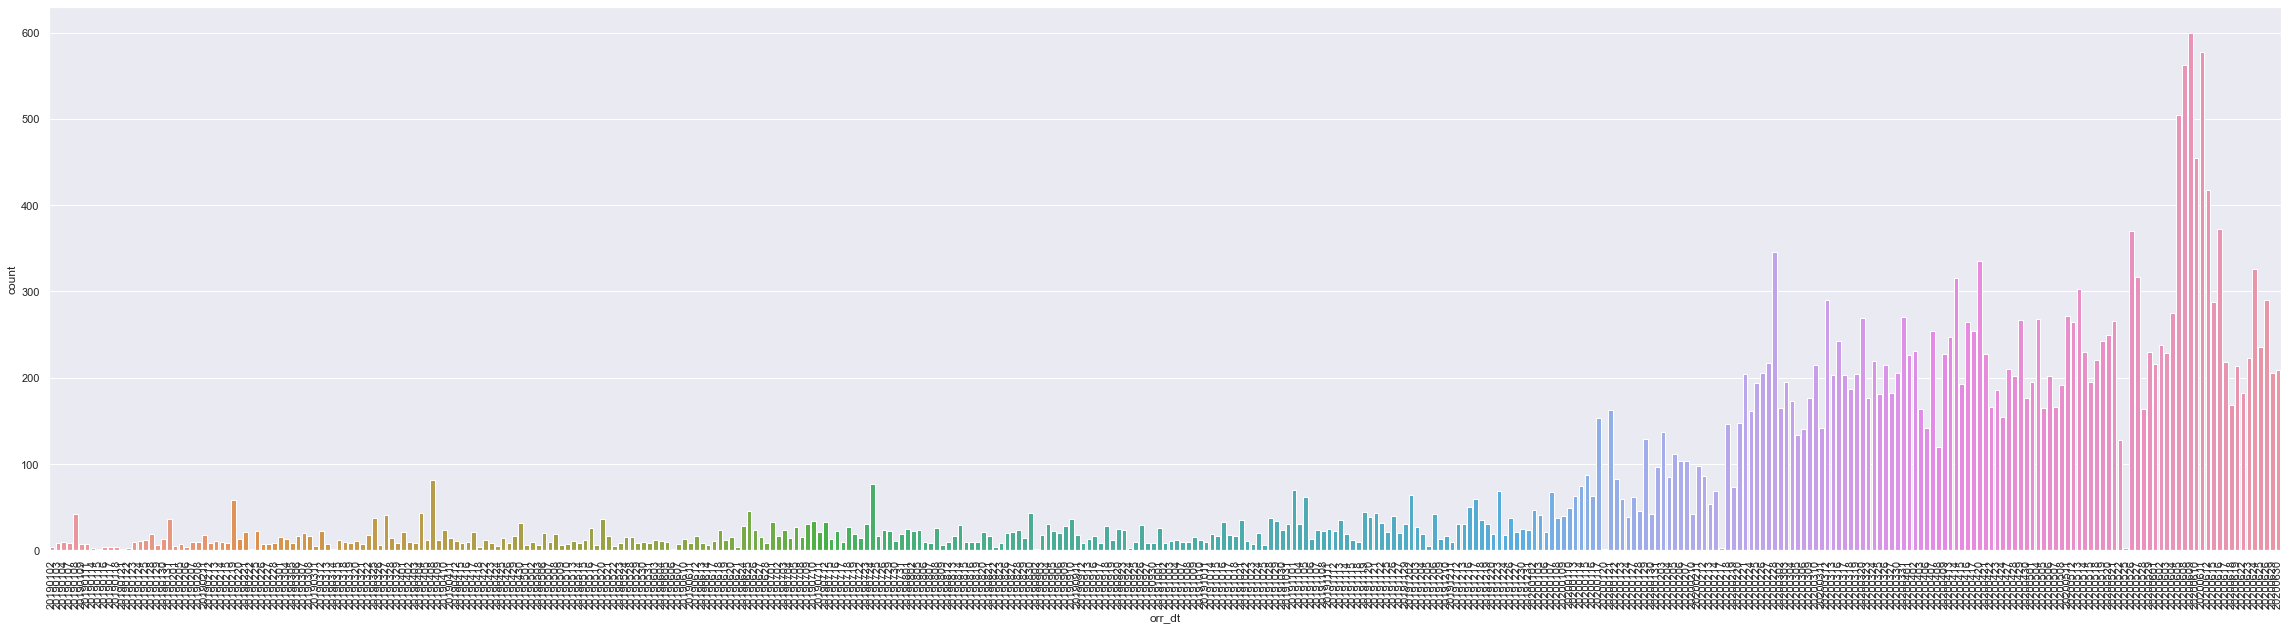

In [139]:
#전체 데이터 대상
# 국내 데이터 거래량
plt.figure(figsize=(40,10))
plt.xticks(rotation =90 )
sns.countplot(x="orr_dt", data=df_kr)

#해외 데이터 거래량
plt.figure(figsize=(40,10))
plt.xticks(rotation =90 )
sns.countplot(x="orr_dt", data=df_oss)

전반적으로 거래량이 꾸준히 증가하는 양상을 보인다. 

In [156]:
df_kr_yz_after_2019=df_kr_yz[df_kr_yz['orr_dt']>201900]
df_oss_yz_after_2019=df_oss_yz[df_oss_yz['orr_dt']>201900]

In [159]:
df_kr_yz_after_2019['orr_dt'] =  df_kr_yz_after_2019['orr_dt'].astype(str)
df_kr_yz_after_2019['orr_dt'] = df_kr_yz_after_2019['orr_dt'].str.slice(start=0,stop=6)
df_oss_yz_after_2019['orr_dt'] =  df_oss_yz_after_2019['orr_dt'].astype(str)
df_oss_yz_after_2019['orr_dt'] = df_oss_yz_after_2019['orr_dt'].str.slice(start=0,stop=6)

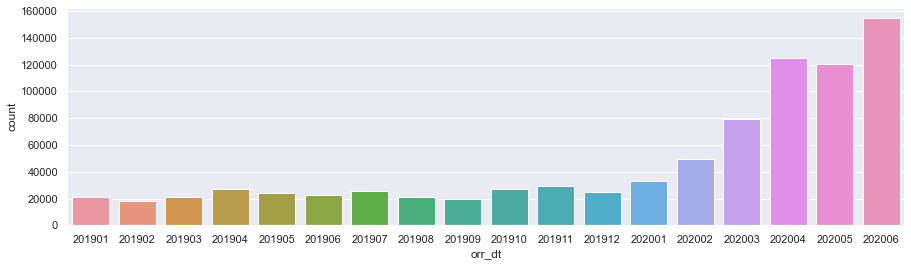

In [160]:
#국내
plt.figure(2, figsize=(15, 4))
sns.countplot(x='orr_dt',data=df_kr_yz_after_2019)

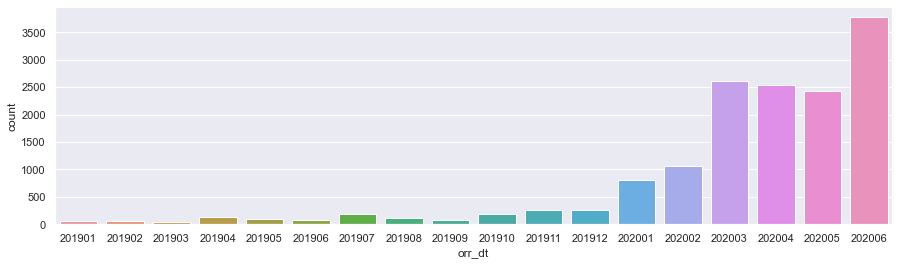

In [161]:
#해외
plt.figure(2, figsize=(15, 4))
sns.countplot(x='orr_dt',data=df_oss_yz_after_2019)

국내, 해외주식의 거래량 모두 2~3월을 기점으로 증가하는 모습을 볼 수 있다.

### 4-3. 코로나 이후 투자종목 변화
#### 4-3-1.yz세대 코로나 전후 국내 투자종목 비교

In [84]:
yz_before_covid19 = df_kr_yz[(df_kr_yz['act_opn_ym']<202000)]['iem_krl_nm'].value_counts().head(50)
yz_after_covid19 = df_kr_yz[(df_kr_yz['act_opn_ym']>=202000)]['iem_krl_nm'].value_counts().head(50)

x_before_covid19 = df_kr_x[(df_kr_x['act_opn_ym']<202000)]['iem_krl_nm'].value_counts().head(50)
x_after_covid19 = df_kr_x[(df_kr_x['act_opn_ym']>=202000)]['iem_krl_nm'].value_counts().head(50)

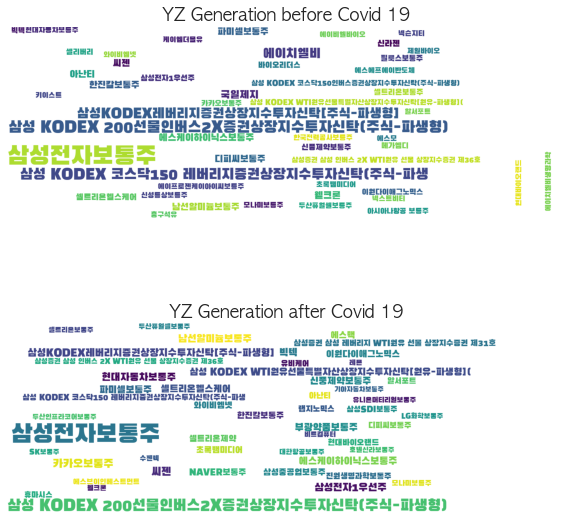

In [85]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(10,10))
ax1.axis('off')
ax2.axis('off')
wordcloud1 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(yz_before_covid19)
wordcloud2 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(yz_after_covid19)
ax1.set_title('YZ Generation before Covid 19',fontsize='x-large')
ax2.set_title('YZ Generation after Covid 19',fontsize='x-large')
ax1.imshow(wordcloud1)
ax2.imshow(wordcloud2)
plt.show()

#### 4-3-2.x세대 코로나 전후 국내 투자종목 비교

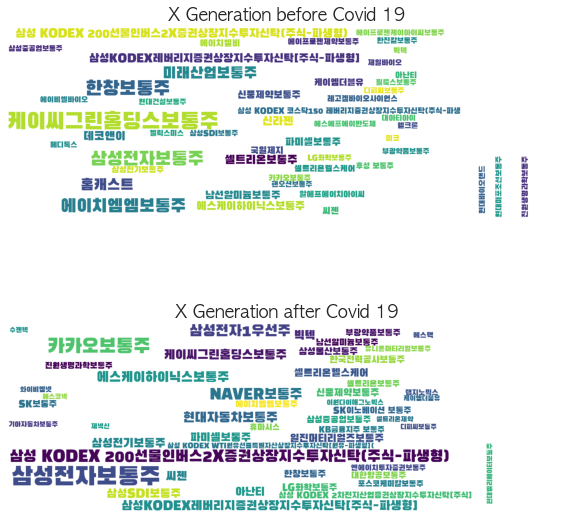

In [86]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(10,10))
ax1.axis('off')
ax2.axis('off')
wordcloud1 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(x_before_covid19)
wordcloud2 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(x_after_covid19)
ax1.set_title('X Generation before Covid 19',fontsize='x-large')
ax2.set_title('X Generation after Covid 19',fontsize='x-large')
ax1.imshow(wordcloud1)
ax2.imshow(wordcloud2)
plt.show()

#### 4-3-3. yz세대 코로나 전후 해외 투자종목 비교

In [87]:
yz_before_covid19 = df_oss_yz[df_oss_yz['act_opn_ym']<202000]['iem_krl_nm'].value_counts().head(50)
yz_after_covid19 = df_oss_yz[df_oss_yz['act_opn_ym']>=202000]['iem_krl_nm'].value_counts().head(50)

x_before_covid19 = df_oss_yz[df_oss_yz['act_opn_ym']<202000]['iem_krl_nm'].value_counts().head(50)
x_after_covid19 = df_oss_yz[df_oss_yz['act_opn_ym']>=202000]['iem_krl_nm'].value_counts().head(50)

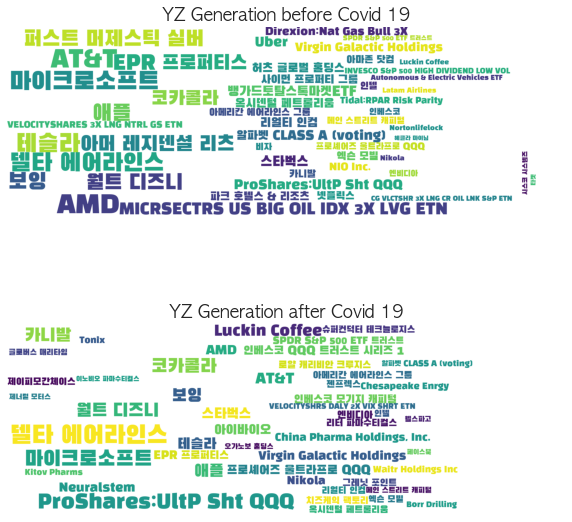

In [88]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(10,10))
ax1.axis('off')
ax2.axis('off')
wordcloud1 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(yz_before_covid19)
wordcloud2 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(yz_after_covid19)
ax1.set_title('YZ Generation before Covid 19',fontsize='x-large')
ax2.set_title('YZ Generation after Covid 19',fontsize='x-large')
ax1.imshow(wordcloud1)
ax2.imshow(wordcloud2)
plt.show()

#### 4-3-4. x세대 코로나 전후 해외 투자종목 비교

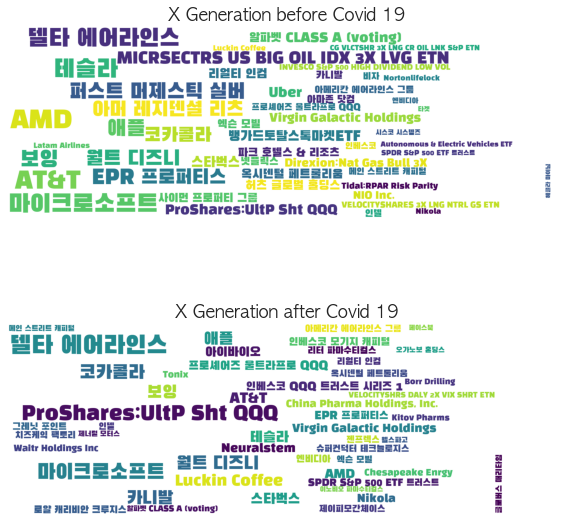

In [89]:
fig,(ax1,ax2) = plt.subplots(nrows=2, figsize=(10,10))
ax1.axis('off')
ax2.axis('off')
wordcloud1 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(x_before_covid19)
wordcloud2 = WordCloud(
    font_path='BlackHanSans-Regular.ttf',
    stopwords=STOPWORDS,
    background_color='#FFFFFF',
    width=1980,
    height=680,
    max_words = 70,
    max_font_size = 1000).generate_from_frequencies(x_after_covid19)
ax1.set_title('X Generation before Covid 19',fontsize='x-large')
ax2.set_title('X Generation after Covid 19',fontsize='x-large')
ax1.imshow(wordcloud1)
ax2.imshow(wordcloud2)
plt.show()

## 5. 수익률
### 해외

In [60]:
df_oss['buy_sell'] = df_oss['sby_dit_cd'].replace(to_replace = 1, value = -1)
df_oss['buy_sell'] = df_oss['sby_dit_cd'].replace(to_replace = 2, value = 1)
df_oss['bs_count'] = df_oss['buy_sell']*df_oss['cns_qty'] #거래개수 * 매매구분
df_oss['bs_pr'] = (-df_oss['buy_sell'])*df_oss['cns_qty']*df_oss['orr_pr'] # 거래가격 * 거래개수 * (-) 매매구분
df_oss['kr_pr'] = (-df_oss['buy_sell'])*df_oss['cns_qty']*df_oss['orr_pr']*df_oss['trd_cur_xcg_rt']         #거래개수 * 매매구분

In [61]:
oss_now1=df_oss.groupby(['cus_id','act_id','iem_cd','iem_krl_nm','cur_cd'],as_index=False)['kr_pr','bs_pr','bs_count'].sum()  
oss_now2=df_oss.groupby(['cus_id','act_id','iem_cd','iem_krl_nm','cur_cd'],as_index=False)['orr_dt','orr_pr','trd_cur_xcg_rt'].last()  
oss_now = pd.merge(oss_now1,oss_now2)
oss_now['now_pr'] = oss_now['orr_pr']*oss_now['bs_count']


#종목당 마지막 거래에서의 가격
df_oss_sorted = df_oss.sort_values(['orr_dt'])
last_oss=df_oss_sorted.groupby(['iem_cd','iem_krl_nm'],as_index=False)['orr_dt','orr_pr','cur_cd','trd_cur_xcg_rt'].last()   
last_oss.rename(columns = {'orr_dt':'orr_dt_last', 'orr_pr':'orr_pr_last', 'cur_cd':'cur_cd_last', 'trd_cur_xcg_rt':'trd_cur_xcg_rt_last'}, inplace = True)


oss_now = pd.merge(oss_now,last_oss,on=['iem_cd','iem_krl_nm'],how ='left')


#oss_now['return']=0
#oss_now['stock_zero'] = 0
oss_now['return_kr'] = 0

oss_now['return_kr'] = oss_now['trd_cur_xcg_rt']*oss_now['now_pr']+oss_now['kr_pr']
#bs_count : 마지막 거래일에 보유한 주식 수
#bs_pr : 이 주식을 갖기까지 사용한 돈
#return : 종목을 모두 판매하여 남은 것이 없을경우 각 고객의 종목당 마지막 거래 순간에서의 수익 /  주식이 있을경우 그 종목의 마지막 거래일의 종목 가격을 이용
#stock_zero : 0 인경우 종목 판매 완료 / 1인경우 종목 보유중

### 국내

In [62]:
df_kr['buy_sell'] = df_kr['sby_dit_cd'].replace(to_replace = 1, value = -1)
df_kr['buy_sell'] = df_kr['sby_dit_cd'].replace(to_replace = 2, value = 1)
df_kr['bs_count'] = df_kr['buy_sell']*df_kr['cns_qty'] #거래개수 * 매매구분
df_kr['kr_pr'] = (-df_kr['buy_sell'])*df_kr['cns_qty']*df_kr['orr_pr'] # 거래가격 * 거래개수 * (-) 매매구분

In [63]:
kr_now1=df_kr.groupby(['cus_id','act_id','iem_cd','iem_krl_nm'],as_index=False)['kr_pr','bs_count'].sum()  
kr_now2=df_kr.groupby(['cus_id','act_id','iem_cd','iem_krl_nm'],as_index=False)['orr_dt','orr_pr'].last()  
kr_now = pd.merge(kr_now1,kr_now2)
kr_now['now_pr'] = kr_now['orr_pr']*kr_now['bs_count']


#종목당 마지막 거래에서의 가격
df_kr_sorted = df_kr.sort_values(['orr_dt'])
last_kr=df_kr_sorted.groupby(['iem_cd','iem_krl_nm'],as_index=False)['orr_dt','orr_pr'].last()   
last_kr.rename(columns = {'orr_dt':'orr_dt_last', 'orr_pr':'orr_pr_last'}, inplace = True)


kr_now = pd.merge(kr_now,last_kr,on=['iem_cd','iem_krl_nm'],how ='left')
kr_now['return_kr'] = (kr_now['bs_count']*kr_now['orr_pr_last'])+kr_now['kr_pr']



### 국내 해외 수익률의 합

In [64]:
kr_return = kr_now.groupby(['cus_id'],as_index=False)['return_kr','kr_pr'].sum()
oss_return = oss_now.groupby(['cus_id'],as_index=False)['return_kr','kr_pr'].sum()

In [65]:
temp =  pd.concat([kr_return,oss_return])
cus_return = temp.groupby(['cus_id'],as_index=False)['kr_pr', 'return_kr',].sum()
cus_info_return = pd.merge(cus_info,cus_return,how='inner')

In [66]:
cus_info_return['rate_of_return'] =( cus_info_return['return_kr']/abs(cus_info_return['kr_pr']) )*100
#rate_of_return : 수익률 

In [67]:
#20,30 고객만 분석

cus_info_return_yz = cus_info_return[cus_info_return['cus_age'].isin([20,25,30,35])]  #20~30대 고객
cus_info_return_notyz = cus_info_return[~cus_info_return['cus_age'].isin([20,25,30,35])] #yz세대가 아닌 고객

### 5-1. 수익률의 절대값이 80 이상인 yz투자자의 투자성향

In [68]:
#수익률의 절대값이 80 이상인 yz투자자의 투자성향

return_per = cus_info_return_yz[(cus_info_return_yz['rate_of_return']>=80)|(cus_info_return_yz['rate_of_return']<=-80)]
ivs_icn_cd = ['01','02','03','04','05']
label = ['01 : 안정형','02 : 안정추구형','03 : 위험중립형','04 : 적극투자형','05 : 공격투자형','00 : 정보제공미동의']
count = []
for i in range(len(ivs_icn_cd)):
    count.append(len(return_per[return_per['ivs_icn_cd']==ivs_icn_cd[i]]))
count

[1, 3, 3, 1, 1]

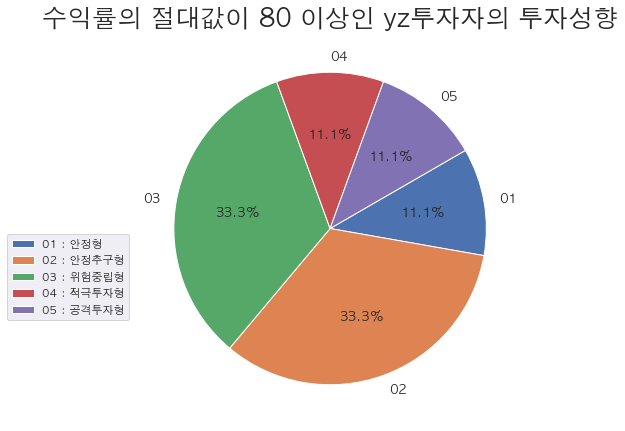

In [70]:
plt.figure(figsize=(7,14))
plt.rcParams['font.family'] = 'AppleGothic'
ivs_icn_cd = ['01','02','03','04','05']
label = ['01 : 안정형','02 : 안정추구형','03 : 위험중립형','04 : 적극투자형','05 : 공격투자형']
plt.pie(count,autopct='%.1f%%', startangle=30,labels = ivs_icn_cd, counterclock=False,textprops = {'fontsize':13})
plt.legend(labels=label, bbox_to_anchor=(0, 0.5))
plt.title('수익률의 절대값이 80 이상인 yz투자자의 투자성향',fontsize=25)
plt.show()

### 5-2. 수익률의 절대값이 80 미만인 yz투자자의 투자성향

In [71]:
#수익률의 절대값이 80 미만인 yz투자자의 투자성향

return_per = cus_info_return_yz[(cus_info_return_yz['rate_of_return']<80) | (cus_info_return_yz['rate_of_return']>-80)]
ivs_icn_cd = ['01','02','03','04','05']
label = ['01 : 안정형','02 : 안정추구형','03 : 위험중립형','04 : 적극투자형','05 : 공격투자형']
count = []
for i in range(len(ivs_icn_cd)):
    count.append(len(return_per[return_per['ivs_icn_cd']==ivs_icn_cd[i]]))
count

[106, 537, 579, 576, 303]

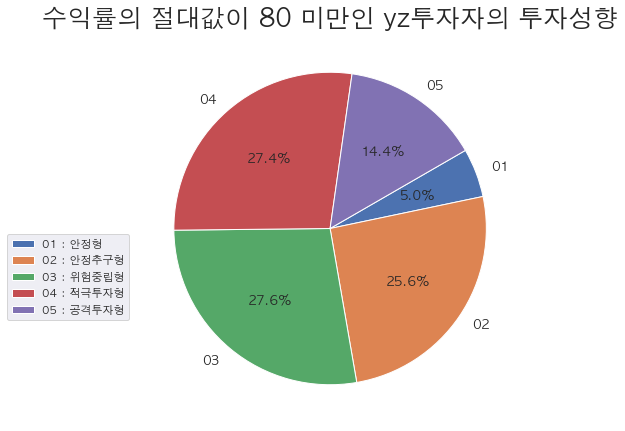

In [72]:
plt.figure(figsize=(7,14))
ivs_icn_cd = ['01','02','03','04','05']
label = ['01 : 안정형','02 : 안정추구형','03 : 위험중립형','04 : 적극투자형','05 : 공격투자형']
plt.pie(count,autopct='%.1f%%', startangle=30,labels = ivs_icn_cd, counterclock=False,textprops = {'fontsize':13})
plt.legend(labels=label, bbox_to_anchor=(0, 0.5))
plt.title('수익률의 절대값이 80 미만인 yz투자자의 투자성향',fontsize=25)
plt.show()

수익률의 절대값이 높은 그룹에서 적극, 공격 투자형의 비율이 높을 것이라고 예상하였으나 
오히려 수익률의 절대값이 낮은 그룹에서 적극, 공격 투자형의 비율이 높게 나타났다. 

### 5-3. yz 세대의 수익률 상위 10% 투자자들이 가장 많이 투자한 종목 10개

In [73]:
top10per = cus_info_return_yz.sort_values(by='rate_of_return',ascending=False).head(342)
kr_top10per = pd.merge(top10per,kr_now,on=['cus_id'],how ='left')
#len(np.unique(kr_top10per['cus_id']))
krtop10stock=kr_top10per['iem_krl_nm'].value_counts().head(10)
krtop10stock = pd.DataFrame(krtop10stock)
krtop10stock = krtop10stock.reset_index()
krtop10stock.columns = ['iem_krl_nm','count']
krtop10stock

,iem_krl_nm,count
0,삼성전자보통주,154
1,카카오보통주,73
2,셀트리온보통주,59
3,에스케이하이닉스보통주,45
4,LG화학보통주,44
5,NAVER보통주,44
6,씨젠,39
7,삼성바이오로직스보통주,38
8,현대자동차보통주,37
9,삼성전자1우선주,36


In [74]:
top10per = cus_info_return_yz.sort_values(by='rate_of_return',ascending=False).head(342)
oss_top10per = pd.merge(top10per,oss_now,on=['cus_id'],how ='left')
#len(np.unique(kr_top10per['cus_id']))
osstop10stock=oss_top10per['iem_krl_nm'].value_counts().head(10)
osstop10stock = pd.DataFrame(osstop10stock)
osstop10stock = osstop10stock.reset_index()
osstop10stock.columns = ['iem_krl_nm','count']
osstop10stock

,iem_krl_nm,count
0,마이크로소프트,7
1,테슬라,6
2,델타 에어라인스,6
3,애플,5
4,월트 디즈니,3
5,알파벳 CLASS A (voting),3
6,아메리칸 에어라인스 그룹,3
7,코카콜라,3
8,아마존 닷컴,3
9,SPDR S&P 500 ETF 트러스트,2


수익률이 상위 10%인 yz 투자자가 가장 많이 투자한 종목 10개는
국내에서 삼성전자보통주, 카카오보통주, 셀트리온보통주, 에스케이하이닉스보통주, LG화학보통주, NAVER보통주, 씨젠, 삼성바이오로직스보통주, 현대자동차보통주, 삼성전자1우선주 

해외에서 마이크로소프트, 델타 에어라인스, 테슬라, 애플, 코카콜라, 월트 디즈니, 아마존 닷컴, 알파벳 CLASS A (voting), 아메리칸 에어라인스 그룹, AT&T 인 것으로 나타났다.                  


